# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

(30478, 13)


Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

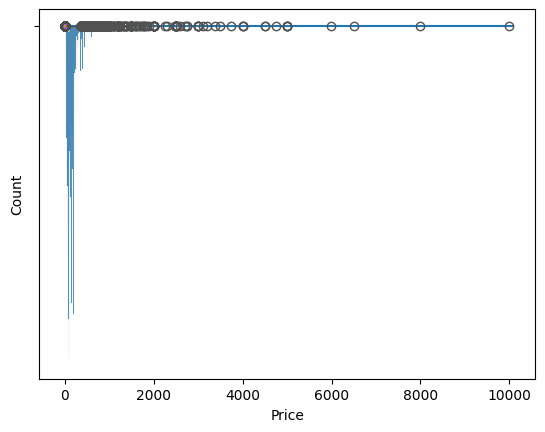

In [35]:
import pandas as pd
# df = pd.read_csv('./data/airbnb_hw.csv') # load the data

# from my wrangling assignment:
df = pd.read_csv('./data/airbnb_hw.csv',low_memory=False) # loading the data
num_var = df['Price'] # length: 30478
num_var = num_var.str.replace(',','') # clean by removing commas (commas indicate str when these are numbers)
num_var = pd.to_numeric(num_var, errors='coerce') # coerce the variable to numeric
# print(num_var)
# print('\n')
# print('Missing values: ', sum(num_var.isnull())) # there are 0 missing values
df['Price'] = num_var
del num_var

print(df.shape) # dimentions are (30478, 13)
# 30478 observations
# variables are: Host Id, Host Since, Name, Neighbourhood, Property Type, Review Scores Rating (bin), Room Type, Zipcode, Beds, 
# Number of Records, Number of Reviews, Price, and Review Scores Rating
df.head()

 # 3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? 
# For which kinds of properties are private rooms more common than renting the entire property?

pd.crosstab(df['Property Type'], df['Room Type']) # cross tabulate
# I see the most common types of rentals available are apartments, houses, and lofts.
# Private rooms are more common than renting the entire property for bed and breakfast,castle, chalet, dorm, house
# hut, other, tent, and treehouse.

  # 4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. 
# Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, 
# and take these steps again.

import seaborn as sns
sns.histplot(data=df, x='Price')
sns.kdeplot(data=df, x='Price')
sns.boxplot(data=df, x='Price')
df['Price'].describe()

# Yes the data is badly scaled and there are outliers.
import numpy as np
df['Price_log'] = np.log(df['Price'])
sns.histplot(data=df, x='Price_log')
sns.kdeplot(data=df, x='Price_log')
sns.boxplot(data=df, x='Price_log')
df['Price_log'].describe()

  # 5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price`
# conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

sns.scatterplot(data=df, x='Beds', y='Price_log')
# I see a scatterplot with a few outliers, and the shape tapers out towards the right
df.loc[:, ['Beds', 'Price']].groupby('Beds').describe()
# Generally, as the number of beds increase, the average price and standard deviation also increases (but it maxes at 12
# beds instead of 16). The increase is also less obvious from 6 beds to 16 and it does fluctuate a bit, likely due to outliers.

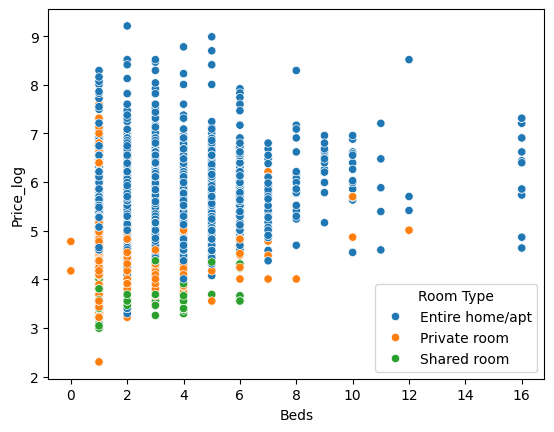

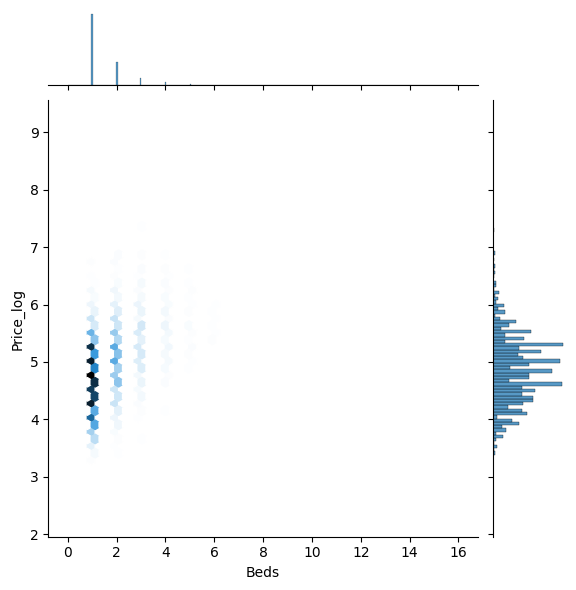

In [36]:
# 6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see?
# Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property
# Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be
# a more reliable estimate of central tendency, and explain why?

sns.scatterplot(data=df, x='Beds', y='Price_log', hue='Room Type')
# sns.scatterplot(data=df, x='Beds', y='Price_log', hue='Property Type')
# I see that for all of the beds #s, the price of an entire home is the most out of all the room types.
# The shared rooms are generally the least expensive.

df.loc[:,['Room Type', 'Price']].groupby('Room Type').describe()
# The entire home/apt has the highest prices on average and highest standard deviation.

# I think the median might be more reliable because there are a lot of outliers.

  # 7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`.
# Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

sns.jointplot(data=df, x='Beds', y='Price_log', kind='hex')
# the data is distributed primarily in beds 1 and 2 ( and some 3 and 4). Going back to the plots in 5 and 6, 
# i think they showed a out of outliers and were not as accurate as i may have previously thought.

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them? 
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [37]:
# i picked Multiple Chronic Conditions

# the data dictionary does not document how missings are handles. For
# categorical variables, it does describe the possible values but not the
# missing value codes. For the numeric variables, it does not describe
# how missing values are handled. It only says when they are blank
# ex: a variable is blank for data aggregated at the national
# level
# in my opinion, i think the data dictionary has a sufficient amount of
# information but its lacking in how it handles missing values

# the variables i chose are Hosp_Readmsn_Rate, Bene_Geo_Cd, and Tot_Mdcr_Pymt_PC
# i found them interesting because they all have many empty values in the csv
# there is nothing in the data dictionary about how to handle them
# so i will make them np.nan values

import pandas as pd
import numpy as np
df = pd.read_csv('./data/CC_R20_P09_v10_D18_WWDSE_MCC.csv',low_memory=False) 
df['Hosp_Readmsn_Rate'] = df['Hosp_Readmsn_Rate'].fillna(np.nan)
df['Bene_Geo_Cd'] = df['Bene_Geo_Cd'].fillna(np.nan)
df['Tot_Mdcr_Pymt_PC'] = df['Tot_Mdcr_Pymt_PC'].fillna(np.nan)
print(df.head())
# print(df)


  Bene_Geo_Lvl Bene_Geo_Desc  Bene_Geo_Cd Bene_Age_Lvl Bene_Demo_Lvl  \
0        State       Alabama          1.0          65+           All   
1        State       Alabama          1.0          65+           All   
2        State       Alabama          1.0          65+           All   
3        State       Alabama          1.0          65+           All   
4        State       Alabama          1.0          65+   Dual Status   

  Bene_Demo_Desc Bene_MCC  Prvlnc  Tot_Mdcr_Stdzd_Pymt_PC  Tot_Mdcr_Pymt_PC  \
0            All   0 to 1  0.2273               2079.0975         1861.7918   
1            All   2 to 3  0.2883               5445.4478         4943.8682   
2            All   4 to 5  0.2629              10156.8657         9258.3928   
3            All       6+  0.2214              27498.8786        25121.0066   
4  Medicare Only   0 to 1  0.2402               2051.7231         1836.0765   

   Hosp_Readmsn_Rate  ER_Visits_Per_1000_Benes  
0             0.0450                  123.3

<AxesSubplot:xlabel='Hosp_Readmsn_Rate'>

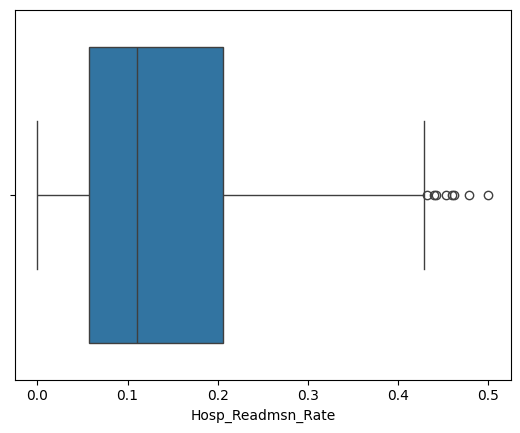

In [38]:
# 5. For the variables you select, make a boxplot for each numeric variable and
# a bar graph for each categorical variable. Do you see any outliers?

# Hosp_Readmsn_Rate is numeric
# Bene_Geo_Cd is numeric
# Tot_Mdcr_Pymt_PC is numeric

import seaborn as sns
sns.boxplot(data=df, x='Hosp_Readmsn_Rate') # I see many outliers

<AxesSubplot:xlabel='Bene_Geo_Cd'>

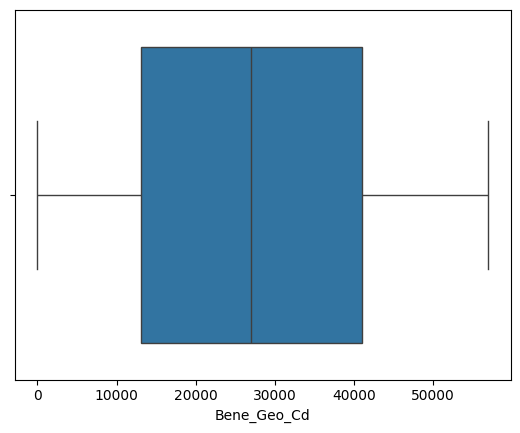

In [39]:

sns.boxplot(data=df, x='Bene_Geo_Cd')
# i see no outliers


<AxesSubplot:xlabel='Tot_Mdcr_Pymt_PC'>

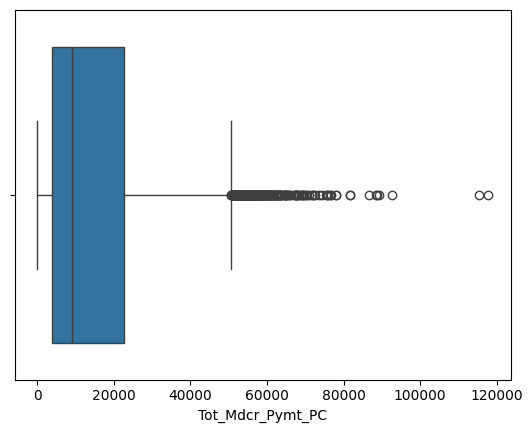

In [40]:
sns.boxplot(data=df, x='Tot_Mdcr_Pymt_PC')
# i see many outliers

Overall, I saw outliers in the box plots for Hosp_Readmsn_Rate and Tot_Mdcr_Pymt_PC, but no outliers in the box plot for Bene_Geo_Cd.

<AxesSubplot:xlabel='Hosp_Readmsn_Rate', ylabel='Density'>

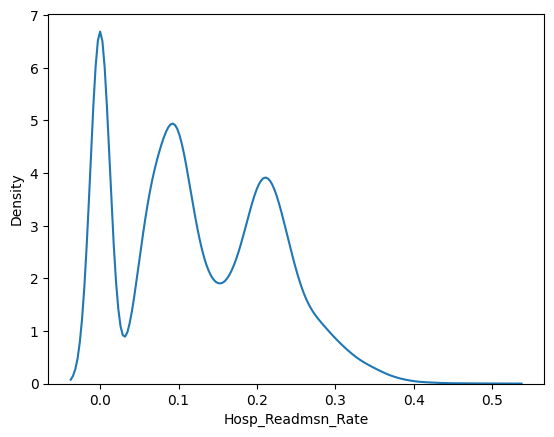

In [41]:
# 6. Create a histogram or kernel density plot, and explain what you see. Do the results
# require any transformations to rescale them? 

sns.kdeplot(data=df, x='Hosp_Readmsn_Rate')


I see that the Hosp_Readmsn_Rate peaks at around 0.0, 0.1, and 0.2, and is gradually decreasing.

<AxesSubplot:xlabel='Bene_Geo_Cd', ylabel='Density'>

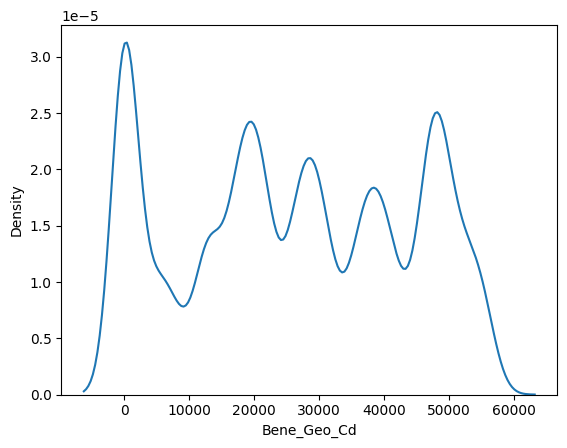

In [42]:
sns.kdeplot(data=df, x='Bene_Geo_Cd')

I see that the Bene_Geo_Cd variable peaks at 0, and has smaller peaks at around 1800, 2600, 2800, and 4800.

<AxesSubplot:xlabel='Tot_Mdcr_Pymt_PC', ylabel='Density'>

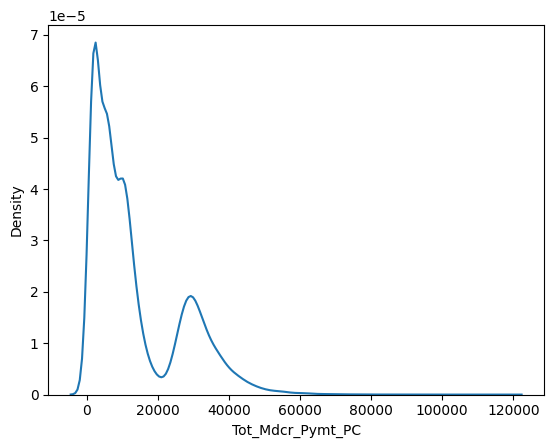

In [43]:
sns.kdeplot(data=df, x='Tot_Mdcr_Pymt_PC')

I see that the Tot_Mdcr_Pymt_PC variable peaks at around 100, and has a smaller peak at 30000.

The kernel density plot did not require any transformations to rescale them.

<AxesSubplot:xlabel='Hosp_Readmsn_Rate', ylabel='Tot_Mdcr_Pymt_PC'>

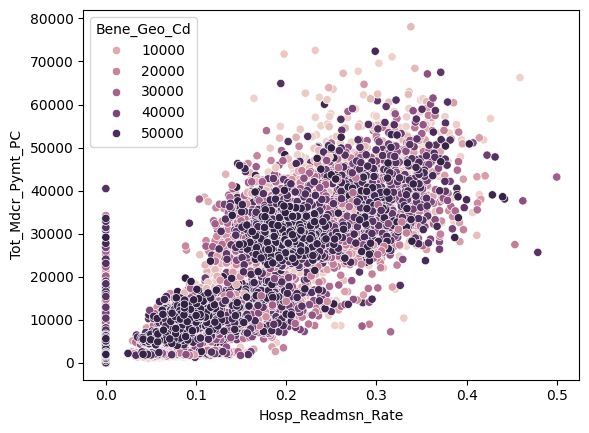

In [44]:
# 7. Create a scatter plot, and describe the relationship you see.

sns.scatterplot(data=df, x='Hosp_Readmsn_Rate', y='Tot_Mdcr_Pymt_PC', hue='Bene_Geo_Cd')
# the relationship looks linearly positive between Hosp_Readmsn_Rate and Tot_Mdcr_Pymt_PC
# with many outliers.

In [45]:
# 8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary),
# and explain what you see.

df.loc[:,['Hosp_Readmsn_Rate', 'Tot_Mdcr_Pymt_PC', 'Bene_Geo_Cd' ]].groupby('Bene_Geo_Cd').describe()


Hosp_Readmsn_Rate                                                 \
                        count      mean       std     min       25%      50%   
Bene_Geo_Cd                                                                    
1.0                      97.0  0.120121  0.079464  0.0000  0.060900  0.09710   
2.0                      87.0  0.123238  0.075275  0.0000  0.060000  0.10870   
4.0                     107.0  0.137158  0.084578  0.0375  0.067100  0.10570   
5.0                     100.0  0.139662  0.085186  0.0000  0.073925  0.11180   
6.0                     116.0  0.137251  0.083540  0.0397  0.075300  0.10290   
...                       ...       ...       ...     ...       ...      ...   
56039.0                   2.0  0.165750  0.042639  0.1356  0.150675  0.16575   
56041.0                   6.0  0.059350  0.091950  0.0000  0.000000  0.00000   
56043.0                   4.0  0.119175  0.137651  0.0000  0.000000  0.11715   
56045.0                   1.0  0.198500       NaN  0.1985  0.198500  0.19850   
56999.0                   0.0       NaN       NaN     NaN       NaN      NaN   

                              Tot_Mdcr_Pymt_PC                              \
                  75%     max            count          mean           std   
Bene_Geo_Cd                                                                  
1.0          0.194200  0.2974            120.0  11488.668151  10683.440086   
2.0          0.197300  0.3028            120.0  19109.473947  17145.121648   
4.0          0.201100  0.3807            120.0  15558.172514  15030.849565   
5.0          0.209100  0.3699            120.0  12425.704591  11499.090886   
6.0          0.200475  0.3801            120.0  17603.899138  17114.353059   
...               ...     ...              ...           ...           ...   
56039.0      0.180825  0.1959              4.0  18097.476075  17468.400858   
56041.0      0.132375  0.1796             12.0  14875.394000  12643.070952   
56043.0      0.236325  0.2424             12.0  19783.236333  18658.104085   
56045.0      0.198500  0.1985              4.0  18553.105925  20591.228982   
56999.0           NaN     NaN              0.0           NaN           NaN   

                                                                            
                   min          25%          50%           75%         max  
Bene_Geo_Cd                                                                 
1.0          1045.5340  3452.530950   7293.79085  16780.432075  46042.3610  
2.0          1192.2586  4724.957875  13409.81425  30094.937575  69601.9846  
4.0          1223.6710  4102.460050  10267.19520  27043.807450  71077.7603  
5.0           922.3133  3301.844700   8553.45615  19317.959300  43262.8452  
6.0          1143.5370  4446.881525  10837.02575  25193.933725  60543.8696  
...                ...          ...          ...           ...         ...  
56039.0      2750.8778  6845.108675  13720.17170  24972.539100  42198.6831  
56041.0      1930.4478  5295.490750  11018.72590  24700.908450  33924.1560  
56043.0      2070.8158  5326.704125  14320.97890  27516.427275  50296.2897  
56045.0      2133.7957  6776.342500  11864.32950  23641.092925  48349.9690  
56999.0            NaN          NaN          NaN           NaN         NaN  

[3249 rows x 16 columns]

I see that the means across the Bene_Geo_Cd didn't change for Hosp_Readmsn_Rate and Tot_Mdcr_Pymt_PC. I see that the standard deviations for both Hosp_Readmsn_Rate and Tot_Mdcr_Pymt_PC flutuate across the Bene_Geo_Cd. I don't see any significant relationships in this table.